In [1]:

#sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read data
train_df_m=pd.read_csv('dinesh/competitions/crowdanalytix/tennis/mens_train_file.csv')
train_df_f=pd.read_csv('dinesh/competitions/crowdanalytix/tennis/womens_train_file.csv')
test_df_m=pd.read_csv('dinesh/competitions/crowdanalytix/tennis/mens_test_file.csv')
test_df_w=pd.read_csv('dinesh/competitions/crowdanalytix/tennis/womens_test_file.csv')


In [3]:
train_df_m.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,12.5628,2.0724,True,F,0.445318,False,5718,1,0,mens
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,12.3544,5.1124,False,B,0.432434,False,371,1,1,mens
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,13.8620,1.6564,False,F,0.397538,True,7948,1,1,mens
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,14.2596,0.1606,True,B,0.671984,True,9312,1,0,mens
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,11.3658,1.1082,False,F,0.340411,False,7667,1,2,mens


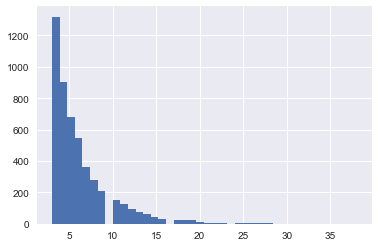

In [4]:
%matplotlib inline
plt.hist(train_df_m['rally'],40);

In [5]:
train_df_m['serve'].value_counts()

1    2904
2    2096
Name: serve, dtype: int64

In [6]:
pd.crosstab(train_df_m['serve'],train_df_m['outcome'])

outcome,0,1,2
serve,,,
1,1087,722,1095
2,1031,476,589


In [7]:
train_df_m['hitpoint'].value_counts()

F    2738
B    1815
U     349
V      98
Name: hitpoint, dtype: int64

In [8]:
pd.crosstab(train_df_m['hitpoint'],train_df_m['outcome'])

outcome,0,1,2
hitpoint,,,
B,882,488,445
F,1105,558,1075
U,104,106,139
V,27,46,25


In [9]:
train_df_m['speed'].mean()

31.161443234855764

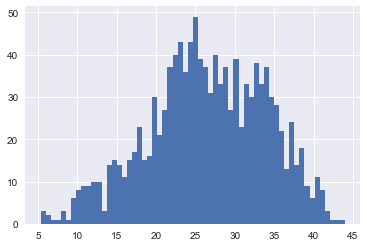

In [10]:
plt.hist(train_df_m[train_df_m['outcome'] == 1]['speed'],60);

In [11]:
train_df_m.groupby('outcome', as_index=False)['speed'].describe()

count  0    2118.000000
       1    1198.000000
       2    1684.000000
mean   0      32.945350
       1      26.451033
       2      32.268781
std    0       6.391199
       1       7.469490
       2       9.258796
min    0       5.967862
       1       5.340688
       2       7.327771
25%    0      29.912475
       1      21.667296
       2      27.109188
50%    0      34.017676
       1      26.501568
       2      34.807194
75%    0      37.092363
       1      32.321962
       2      38.731978
max    0      49.167246
       1      44.000735
       2      60.414369
dtype: float64

In [12]:
train_df_m[(train_df_m['speed']>40) & (train_df_m['speed']<50)]['outcome'].value_counts()

2    285
0    199
1     25
Name: outcome, dtype: int64

In [13]:
train_df_m.groupby('hitpoint', as_index=False)['speed'].describe()

count  0    1815.000000
       1    2738.000000
       2     349.000000
       3      98.000000
mean   0      29.013043
       1      33.096292
       2      28.113774
       3      27.746813
std    0       7.420002
       1       7.805805
       2      10.387554
       3       7.678983
min    0       5.340688
       1       5.488696
       2       6.549343
       3      10.031523
25%    0      24.143910
       1      29.280717
       2      20.221722
       3      22.758536
50%    0      30.496109
       1      34.748860
       2      29.754412
       3      27.377642
75%    0      34.772951
       1      38.528593
       2      35.560823
       3      34.328938
max    0      47.229305
       1      60.414369
       2      52.393541
       3      41.930299
dtype: float64

In [14]:
train_df_m[(train_df_m['outcome']==0) & (train_df_m['net.clearance']<0)]

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,12.5628,2.0724,True,F,0.445318,False,5718,1,0,mens
15,7,1,U,36.984760,-0.080511,2.604461,7.903262,False,False,2.700817,...,10.8510,3.9264,False,F,0.371189,True,1644,1,0,mens
16,7,1,F,36.140412,-0.018194,2.538349,7.412127,False,False,3.490040,...,15.0244,0.7144,True,F,0.502078,True,1202,1,0,mens
24,16,2,U,27.967935,-0.946992,0.544084,0.827362,False,True,1.429067,...,12.4492,2.2526,False,U,0.422595,False,4599,1,0,mens
40,5,1,B,35.989531,-0.144370,1.885000,7.375106,False,False,1.520679,...,13.9172,1.4280,False,F,0.497515,True,8712,1,0,mens
69,12,1,B,37.058323,-0.038129,3.884955,6.311069,False,False,3.920201,...,12.6902,1.3300,False,F,0.427452,False,1888,1,0,mens
70,7,2,B,27.729342,-0.051597,2.731384,5.014532,False,False,1.065037,...,12.6868,2.4880,False,B,0.450606,True,1156,1,0,mens
74,4,2,B,31.154247,-0.179589,3.071877,7.850869,False,False,3.928555,...,12.2990,0.9132,False,F,0.415095,False,7587,1,0,mens
83,3,2,F,35.261031,-0.051474,2.060361,7.381836,False,False,0.847424,...,13.4524,2.9786,False,B,0.485999,True,7209,1,0,mens
84,7,2,B,27.121727,-0.002003,3.740524,6.340935,False,False,1.298631,...,14.5310,2.4054,False,F,0.506053,True,5044,1,0,mens


In [16]:
train_df_m[(train_df_m['net.clearance']<0)]['outcome'].value_counts()

0    860
1    536
2     30
Name: outcome, dtype: int64

In [17]:
train_df_m[(train_df_m['net.clearance']>0)]['outcome'].value_counts()

2    1654
0    1258
1     662
Name: outcome, dtype: int64

In [69]:
train_df_m[(train_df_m['net.clearance']==0)]['outcome'].value_counts() #nothing for net.clearance =0

Series([], Name: outcome, dtype: int64)

In [20]:
train_df_m['distance.from.sideline'].describe()

count    5000.000000
mean        1.446501
std         1.107850
min         0.000378
25%         0.535640
50%         1.194245
75%         2.150703
max        16.343755
Name: distance.from.sideline, dtype: float64

In [26]:
train_df_m[(train_df_m['distance.from.sideline']>4.10)]['outside.sideline'].value_counts()

True     11
False    10
Name: outside.sideline, dtype: int64

In [30]:
pd.crosstab(train_df_m[(train_df_m['distance.from.sideline']>4)]['outside.sideline'],train_df_m[(train_df_m['distance.from.sideline']>4)]['outcome'])

outcome,0,1,2
outside.sideline,,,
False,25,24,4
True,1,10,0


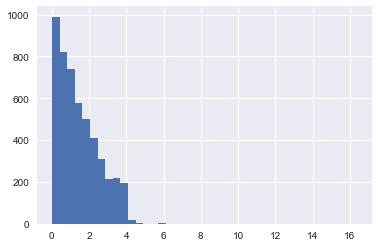

In [34]:
plt.hist(train_df_m['distance.from.sideline'],40);

In [35]:
pd.crosstab(train_df_m['outside.sideline'],train_df_m['outcome'])

outcome,0,1,2
outside.sideline,,,
False,1493,861,1680
True,625,337,4


In [39]:
train_df_m[(train_df_m['outcome']==2) & (train_df_m['outside.sideline']==True)]

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
450,3,1,B,38.101442,0.158981,0.054729,4.938593,True,False,2.327890,...,12.6316,4.5510,False,F,0.480285,True,5969,1,2,mens
557,7,2,U,15.485040,-0.947000,3.663299,2.521155,True,True,11.708994,...,5.1750,1.8036,False,F,0.554648,True,3444,1,2,mens
1675,4,1,U,12.069555,-0.947000,1.832185,2.231758,True,False,1.583215,...,6.9278,1.7174,False,F,0.339812,False,3248,1,2,mens
2207,4,1,F,41.526229,0.637051,0.604297,4.010822,True,True,3.486108,...,13.3300,4.1098,False,F,0.423889,False,2315,1,2,mens


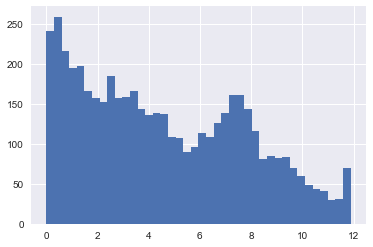

In [40]:
plt.hist(train_df_m['depth'],40);

In [41]:
train_df_m['depth'].describe()

count    5000.000000
mean        4.582527
std         3.194891
min         0.000282
25%         1.738331
50%         4.086093
75%         7.251723
max        11.885770
Name: depth, dtype: float64

In [42]:
pd.crosstab(train_df_m['outside.baseline'],train_df_m['outcome'])

outcome,0,1,2
outside.baseline,,,
False,1479,883,1669
True,639,315,15


In [55]:
train_df_m[(train_df_m['outcome']==2) & (train_df_m['outside.baseline']==True)]

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
161,4,2,B,38.067721,0.503376,1.247838,0.054719,False,True,2.944265,11.9610,0.8338,11.7630,2.1038,29.557862,0.400971,2.185082,4.097003,12.6572,1.7902,False,F,0.492360,False,1937,1,2,mens
502,6,2,F,39.912138,0.617764,1.482524,0.080177,False,True,2.018518,13.4292,3.7694,13.4510,1.7510,32.002128,0.695890,0.758130,4.546583,13.1684,3.2348,False,F,0.502348,False,8489,1,2,mens
557,7,2,U,15.485040,-0.947000,3.663299,2.521155,True,True,11.708994,7.2774,3.3534,14.9540,5.4880,11.996030,1.543894,0.777352,5.286659,5.1750,1.8036,False,F,0.554648,True,3444,1,2,mens
927,18,2,F,37.057220,0.991396,0.657036,0.057976,False,True,3.502804,13.5246,3.1378,14.0472,0.3258,34.520006,0.375786,1.645768,5.202198,14.5712,2.4410,True,F,0.503091,False,8235,1,2,mens
1435,3,1,F,39.196247,0.955831,0.126016,0.100417,False,True,0.802088,10.5602,0.7030,11.2346,1.1372,19.585024,1.863575,2.987221,4.565487,11.8836,3.8290,False,F,0.733682,True,3245,1,2,mens
1607,9,2,B,20.738478,1.241219,0.561777,0.617471,False,True,0.000000,2.6350,0.1760,2.6350,0.1760,25.893767,0.829070,0.962289,0.481118,10.7796,2.4882,False,B,0.470535,True,2823,1,2,mens
2046,9,1,B,37.787812,0.687539,1.042705,0.112662,False,True,2.957832,13.1224,5.1578,13.3112,2.2060,26.259196,0.770381,1.000064,6.321104,11.8122,2.5300,False,F,0.564786,True,6327,1,2,mens
2207,4,1,F,41.526229,0.637051,0.604297,4.010822,True,True,3.486108,15.8724,1.6566,14.5322,1.5616,43.130154,0.080187,1.256144,5.653233,13.3300,4.1098,False,F,0.423889,False,2315,1,2,mens
2287,6,1,F,41.125927,0.707137,0.788713,0.116381,False,True,3.937907,9.4152,2.2866,13.2828,1.5458,19.467596,1.822989,3.488019,4.603407,13.2816,2.5690,False,B,0.887937,False,7140,1,2,mens
2379,12,2,F,35.260205,1.667638,0.041171,0.073441,False,True,5.152166,13.3100,2.0150,12.1376,3.0020,23.712344,1.736735,0.443920,4.727487,10.5520,12.9950,False,U,0.837311,False,1106,1,2,mens


In [45]:
train_df_m.groupby('outcome', as_index=False)['player.distance.travelled'].describe()

count  0    2118.000000
       1    1198.000000
       2    1684.000000
mean   0       2.416237
       1       3.646367
       2       3.098566
std    0       1.430603
       1       2.039182
       2       1.896966
min    0       0.000000
       1       0.000000
       2       0.000000
25%    0       1.390418
       1       2.205188
       2       1.729998
50%    0       2.192908
       1       3.358846
       2       2.691236
75%    0       3.154387
       1       4.750960
       2       4.146440
max    0      10.934088
       1      14.480546
       2      12.134457
dtype: float64

In [48]:
train_df_m[(train_df_m['player.distance.travelled']<1)]['outcome'].value_counts()

0    316
2    160
1     76
Name: outcome, dtype: int64

In [50]:
train_df_m_pdt_le_1=train_df_m[(train_df_m['player.distance.travelled']<1)]
pd.crosstab(train_df_m_pdt_le_1['outcome'],train_df_m_pdt_le_1['hitpoint'])

hitpoint,B,F,U,V
outcome,,,,
0,148,157,8,3
1,37,29,9,1
2,41,99,18,2


In [52]:
train_df_m[(train_df_m['outside.baseline']==False) & (train_df_m['outside.sideline']==False)]['outcome'].value_counts()

2    1667
0     955
1     601
Name: outcome, dtype: int64

In [54]:
pd.set_option('display.max_columns', 500)

In [56]:
train_df_m[(train_df_m['outside.baseline']==False) & (train_df_m['outside.sideline']==False)]['net.clearance'].describe()

count    3223.000000
mean        0.298041
std         0.880450
min        -0.998184
25%        -0.114843
50%         0.157974
75%         0.503402
max        12.815893
Name: net.clearance, dtype: float64

In [57]:
train_df_m['net.clearance'].describe()

count    5000.000000
mean        0.630771
std         1.032237
min        -0.998184
25%        -0.033606
50%         0.428872
75%         0.957190
max        12.815893
Name: net.clearance, dtype: float64

In [66]:
train_df_m[(train_df_m['outside.baseline']==False) & (train_df_m['outside.sideline']==False)&(train_df_m['net.clearance']<0)]['outcome'].value_counts()

0    824
1    490
2     28
Name: outcome, dtype: int64

In [67]:
train_df_m[(train_df_m['outside.baseline']==False) & (train_df_m['outside.sideline']==False)&(train_df_m['net.clearance']>0)]['outcome'].value_counts()

2    1639
0     131
1     111
Name: outcome, dtype: int64

In [72]:
train_df_m.groupby('hitpoint')['player.impact.depth'].describe()

,count,mean,std,min,25%,50%,75%,max
hitpoint,,,,,,,,
B,1815.0,12.041472,3.018295,2.1560,11.42270,12.9174,13.88030,17.0766
F,2738.0,11.791952,2.927235,2.2840,10.80405,12.5680,13.58115,18.1256
U,349.0,10.458741,4.250801,2.8516,6.23660,11.5296,14.41120,18.7006
V,98.0,12.692745,3.388650,3.6588,11.65885,13.4346,15.12005,17.4040


In [73]:
train_df_m.groupby('outcome')['player.impact.depth'].describe()

,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
0,2118.0,12.551235,2.050486,3.0502,12.0996,12.9221,13.70400,17.3020
1,1198.0,12.970791,3.112081,2.1560,12.4443,13.6758,15.00555,18.7006
2,1684.0,10.043409,3.418228,2.2840,7.0836,11.0849,12.75145,17.1774


In [74]:
train_df_m['player.impact.depth'].corr(train_df_m['player.depth'])

0.77033804153638552

In [96]:
train_df_m[(train_df_m['player.depth']-train_df_m['player.impact.depth'])>3.5]['outcome'].value_counts(normalize=True)

2    0.714286
0    0.166234
1    0.119481
Name: outcome, dtype: float64

In [109]:
train_df_m[(train_df_m['player.depth']-train_df_m['player.impact.depth'])<0]['outcome'].value_counts(normalize=True)

0    0.450581
1    0.321429
2    0.227990
Name: outcome, dtype: float64

In [78]:
train_df_m[(train_df_m['player.depth']-train_df_m['player.impact.depth'])==0]['outcome'].value_counts()

1    6
2    3
0    1
Name: outcome, dtype: int64

In [80]:
train_df_m[(train_df_m['player.depth']-train_df_m['player.impact.depth'])>0]['hitpoint'].value_counts()

F    1383
B     958
U     199
V      42
Name: hitpoint, dtype: int64

In [110]:
train_df_m['player.distance.from.center'].corr(train_df_m['player.impact.distance.from.center'])

0.075433275141657985

In [111]:
train_df_m.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,1.1448,13.6704,0.2330,32.313592,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,5718,1,0,mens
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,4.6258,12.6358,2.3162,34.060788,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,371,1,1,mens
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,1.4336,13.6996,2.0908,39.806628,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,7948,1,1,mens
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,0.0312,13.1492,0.0188,25.018818,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,9312,1,0,mens
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,1.7596,14.1310,0.3150,36.790979,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,7667,1,2,mens


In [130]:
train_df_m[(train_df_m['player.distance.travelled']- ((train_df_m['player.depth']-train_df_m['player.impact.depth']).abs()))<0.03]['outcome'].value_counts(normalize=False) #nouse

2    170
0    123
1     44
Name: outcome, dtype: int64

In [132]:
train_df_m[train_df_m['previous.net.clearance']<0]['outcome'].value_counts()

Series([], Name: outcome, dtype: int64)

In [133]:
pd.crosstab(train_df_m['previous.hitpoint'],train_df_m['outcome'])

outcome,0,1,2
previous.hitpoint,,,
B,918,366,669
F,996,673,574
U,117,62,67
V,87,97,374


In [134]:
train_df_m['player.impact.depth'].corr(train_df_m['previous.depth'])

-0.65903788859622436

In [136]:
train_df_m['player.impact.depth'].corr(11.89-train_df_m['previous.depth'])

0.65903788859622425

In [145]:
train_df_m[(train_df_m['player.impact.depth']-(11.89-train_df_m['previous.depth']))<0].head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,id,train,outcome,gender
86,25,2,B,23.764171,1.016154,1.397547,4.153086,False,False,2.291212,6.5614,2.5452,4.4436,1.6708,18.647528,3.186178,0.300516,4.432657,11.6368,3.4188,True,V,1.017677,True,1419,1,2,mens
198,7,1,U,33.858435,0.808869,1.796602,3.854470,False,False,3.412743,6.8334,3.0920,7.7154,0.2048,20.505660,3.335437,0.064795,3.754983,14.3012,3.1060,False,V,1.214402,True,5443,1,2,mens
222,7,1,B,18.842792,2.224412,3.187437,3.844322,False,True,1.291164,4.9072,2.3224,4.6334,1.0606,28.188170,0.712519,0.640846,6.677813,8.7434,3.6760,True,V,0.341773,True,4908,1,1,mens
662,5,1,F,22.530479,0.048454,1.068195,5.924819,False,False,5.347792,5.5232,1.0400,10.5882,0.6760,25.622405,0.929409,4.091650,6.191403,14.8132,1.5958,True,V,0.704976,True,7867,1,2,mens
666,7,1,U,17.348718,2.647835,2.823836,0.252831,False,False,3.319451,4.5818,0.3872,7.8964,0.5666,15.718948,0.054844,2.578684,7.085701,12.7760,0.2532,True,U,0.423000,True,3588,1,0,mens


In [144]:
pd.crosstab(train_df_m[(train_df_m['player.impact.depth']-(11.89-train_df_m['previous.depth']))<0]['previous.hitpoint'],train_df_m[(train_df_m['player.impact.depth']-(11.89-train_df_m['previous.depth']))<0]['outcome'])

outcome,0,1,2
previous.hitpoint,,,
B,2,3,3
F,1,3,2
U,2,1,0
V,4,16,56


In [146]:
train_df_m['previous.depth'].describe()

count    5000.000000
mean        4.318172
std         2.125320
min         0.010852
25%         2.754327
50%         4.153317
75%         5.756835
max         9.996154
Name: previous.depth, dtype: float64